# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** Mateusz Karpiak

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [90]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

In [91]:
def spare_matrix_Abt(m: int, n: int) -> tuple[np.ndarray, np.ndarray] | None:
    try:
            if not isinstance(m,int) or not isinstance(n,int):
                return None
            if m<=0 or n<=0:
                return None
            t=np.linspace(0,1,m)
            return (np.asarray(np.vander(t,n, True)),np.asarray([np.cos(4*_t) for _t in t]))
    except Exception:
        return None

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [92]:
# ===== Twoja implementacja tutaj =====
from main import square_from_rectan,residual_norm
from scipy import linalg
import timeit
from statistics import mean
m=50
n=12
A,b = spare_matrix_Abt(m,n)
norm=[]
time=[]
memory=[]
norm_lambda = lambda : residual_norm(A,x,b)

#Metoda 1
x=np.linalg.solve(*square_from_rectan(A,b))
%timeit -o np.linalg.solve(*square_from_rectan(A,b))
time.append(mean(timeit.repeat(lambda:np.linalg.solve(*square_from_rectan(A,b)),number=1,repeat=10)))
norm.append(norm_lambda())
tm = %memit -o np.linalg.solve(*square_from_rectan(A,b))
memory.append(tm)

#Metoda 2
x=np.linalg.lstsq(A,b)[0]
%timeit -o np.linalg.lstsq(A,b)
time.append(mean(timeit.repeat(lambda:np.linalg.lstsq(A,b),number=1,repeat=10)))
norm.append(norm_lambda())
tm = %memit -o np.linalg.lstsq(A,b)[0]
memory.append(tm)
#Metoda 3

Q, R = np.linalg.qr(A)
x=linalg.solve_triangular(R, Q.T @ b)

def met3():
    Q, R = np.linalg.qr(A)
    return linalg.solve_triangular(R, Q.T @ b)
x=met3()
time.append(mean(timeit.repeat(met3,number=1,repeat=10)))
%timeit -o met3()
norm.append(norm_lambda())
tm = %memit -o met3()
memory.append(tm)

#Metoda 4
def met4():
    U, sigma, V = np.linalg.svd(A, False)
    sigma = np.diag(sigma)
    return V.T @ np.linalg.solve(sigma, U.T @ b)

x=met4()
time.append(mean(timeit.repeat(met4,number=1,repeat=10)))
%timeit -o met4()
norm.append(norm_lambda())
tm = %memit -o met4()
memory.append(tm)


24.8 μs ± 540 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
peak memory: 149.44 MiB, increment: 0.01 MiB
66.2 μs ± 3.88 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
peak memory: 147.34 MiB, increment: 0.01 MiB
118 μs ± 6.26 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
peak memory: 147.50 MiB, increment: 0.01 MiB
99.3 μs ± 2.65 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
peak memory: 147.52 MiB, increment: 0.01 MiB


In [93]:
# Przykładowa forma zestawienia wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time[0])[:29]}")
print(f"Druga metoda    :  {str(time[1])[:29]}")
print(f"Trzecia metoda  :  {str(time[2])[:29]}")
print(f"Czwarta metoda  :  {str(time[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  1.320e-07
Druga metoda    :  7.999e-09
Trzecia metoda  :  7.999e-09
Czwarta metoda  :  7.999e-09

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  3.195999597664923e-05
Druga metoda    :  0.00014070999750401825
Trzecia metoda  :  0.00015173000283539296
Czwarta metoda  :  0.00013294999371282756

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  peak memory: 149.44 MiB, increment: 0.01 MiB
Druga metoda    :  peak memory: 147.34 MiB, increment: 0.01 MiB
Trzecia metoda  :  peak memory: 147.50 MiB, increment: 0.01 MiB
Czwarta metoda  :  peak memory: 147.52 MiB, increment: 0.01 MiB


Metoda I wykonuje się najszybiej, jednocześnie jest najmniej dokładna. Pozostałe metody mają podobne residua, mniejsze od metody I. Metoda I zajmuje więcej pamięci niż pozostałe metody, które używałą zbliżoną do siebie ilość pamięci.

---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [94]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

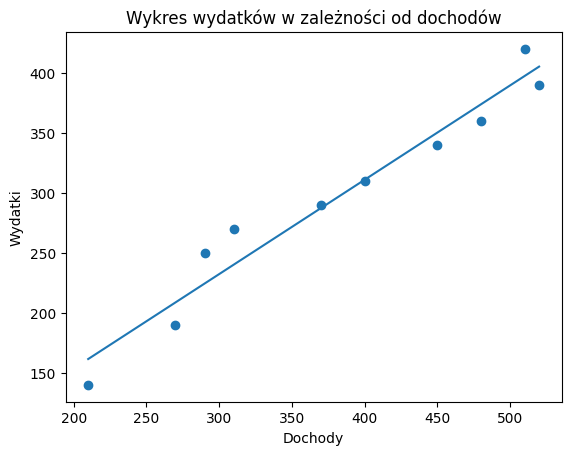

Dla dochodu 210 błąd wynosi 21.577108319954704
Dla dochodu 270 błąd wynosi 18.74303522523377
Dla dochodu 290 błąd wynosi 25.53498913967323
Dla dochodu 310 błąd wynosi 29.813013504580198
Dla dochodu 370 błąd wynosi 2.647086599301133
Dla dochodu 400 błąd wynosi 0.9358768533384136
Dla dochodu 450 błąd wynosi 10.240815941070935
Dla dochodu 480 błąd wynosi 13.823779393710481
Dla dochodu 510 błąd wynosi 22.593257153649972
Dla dochodu 520 błąd wynosi 15.267730663896543
Suma kwadratów odchyleń dla dopasowania liniowego wynosi:3405.1374067428474
Suma kwadratów odchyleń dla dopasowania wielomianowego 3 stopnia wynosi:2134.1240767261274


In [95]:
# ===== Twoja implementacja tutaj =====

def lin_reg(x,y):
    n=len(x)
    b=(sum(y)*sum(x**2)-sum(x)*sum(x*y))/(n*sum(x**2)-sum(x)**2)
    a=(n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-sum(x)**2)
    return a,b

a,b=lin_reg(d,w)

plt.scatter(d,w)
plt.plot(d,[a*x+b for x in d])
plt.title("Wykres wydatków w zależności od dochodów")
plt.xlabel("Dochody")
plt.ylabel("Wydatki")
plt.show()
k=[]
for _w,_d in zip(w,d):
    k.append(abs((a*_d+b)-_w))
    print(f"Dla dochodu {_d} błąd wynosi {k[-1]}")
print(f"Suma kwadratów odchyleń dla dopasowania liniowego wynosi:{sum([l*l for l in k])}")

k=[]
a,b,c,g=np.polyfit(d,w,3)
for _w,_d in zip(w,d):
    k.append(abs((a*_d**3+b*_d**2+c*_d+g)-_w))
print(f"Suma kwadratów odchyleń dla dopasowania wielomianowego 3 stopnia wynosi:{sum([l*l for l in k])}")

Można uzyskać lepszy wynik dopasowywując wielomian stopnia wyższego niż 1. Dla tych danych suma kwadratów odchylen dla wielomanu stopnia 3 jest zauważalnie mniejsza od sumy dla dopasowania liniowego.

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

In [96]:
# ===== Twoja implementacja tutaj =====
from main import residual_norm
x1,x2,e=(np.random.normal(size=[100,1]) for i in range(3))
y=2+x1-0.5*x2+e

def rozk_QR(Z, y):
    Q, R = np.linalg.qr(Z)
    Qt_y = Q.T @ y
    return np.linalg.solve(R, Qt_y)

ones = np.ones([100, 1])

M1 = np.concatenate([ones, x1], 1)
M2 = np.concatenate([ones, x2], 1)
M3 = np.concatenate([ones,x1, x2], 1)
M4 = np.concatenate([ones, x1, x2, x1 * x2], 1)

norms = []


### Model 1
$$
y = b_0 \cdot 1 + b_1 \cdot x_1
$$

$$
\begin{bmatrix}
1 & x_1
\end{bmatrix}
\begin{bmatrix}
b_0 \\[4pt] b_1
\end{bmatrix}
= y
$$



b=array([[2.11108285],
       [0.91868727]])
Macierz Z:(100, 2), b:(2, 1), y:(100, 1)
Norma residuum dla modelu 1: 9.985476702260627


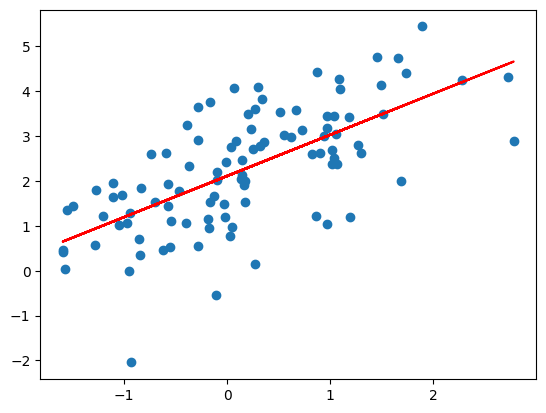

In [97]:
b=rozk_QR(M1, y)
print(f"{b=}")
norms.append(residual_norm(M1, b, y))
Y1=b[0]+b[1]*x1
print(f"Macierz Z:{M2.shape}, b:{b.shape}, y:{y.shape}")
print(f"Norma residuum dla modelu 1: {norms[0]}")
plt.scatter(x1, y, label='Dane rzeczywiste')
plt.plot(x1, Y1, color='red', label='Dopasowanie liniowe')
plt.show()



### Model 2
$$
y = b_0 \cdot 1 + b_1 \cdot x_2
$$

$$
\begin{bmatrix}
1 & x_2
\end{bmatrix}
\begin{bmatrix}
b_0 \\[4pt] b_1
\end{bmatrix}
= y
$$



b=array([[ 2.26796128],
       [-0.27210855]])
Macierz Z:(100, 2), b:(2, 1), y:(100, 1)  
Norma residuum dla modelu 2: 12.964332965540883


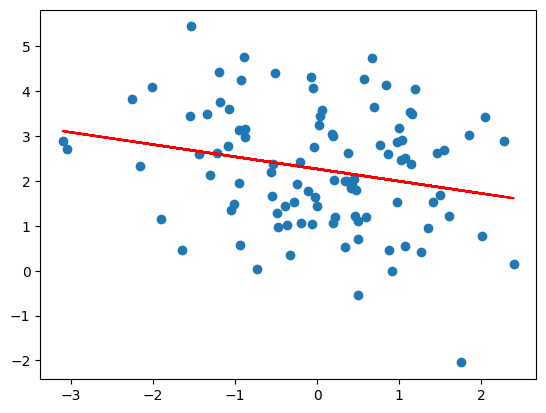

In [98]:
b=rozk_QR(M2, y)
print(f"{b=}")
norms.append(residual_norm(M2, b, y))
Y2=b[0] + b[1] * x2
print(f"Macierz Z:{M2.shape}, b:{b.shape}, y:{y.shape}  ")
print(f"Norma residuum dla modelu 2: {norms[1]}")
plt.scatter(x2, y, label='Dane rzeczywiste')
plt.plot(x2, Y2, color='red', label='Dopasowanie liniowe')
plt.show()



### Model 3
$$
y = b_0 \cdot 1 + b_1 \cdot x_1 + b_2 \cdot x_2
$$

$$
\begin{bmatrix}
1 & x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
b_0 \\[4pt] b_1 \\[4pt] b_2
\end{bmatrix}
= y
$$



b=array([[ 2.11576124],
       [ 0.97039116],
       [-0.36998453]])
Macierz Z:(100, 2), b:(3, 1), y:(100, 1)  
Norma residuum dla modelu 3: 9.08117164503633


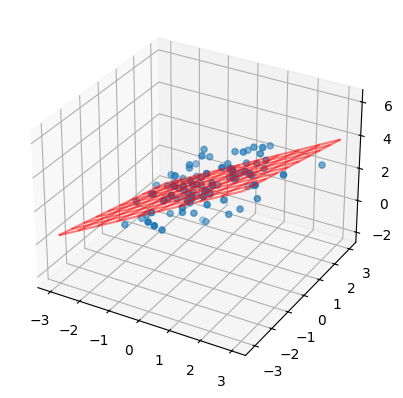

In [102]:

b=rozk_QR(M3, y)
print(f"{b=}")
norms.append(residual_norm(M3, b, y))
_X, _Y = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
Y3 = b[0] + b[1] * _X + b[2] * _Y
print(f"Macierz Z:{M2.shape}, b:{b.shape}, y:{y.shape}  ")
print(f"Norma residuum dla modelu 3: {norms[2]}")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, label='Dane rzeczywiste')
ax.plot_wireframe(_X, _Y, Y3, color='red', alpha=0.5, label='Dopasowanie liniowe')
plt.show()



### Model 4
$$
y = b_0 \cdot 1 + b_1 \cdot x_1 + b_2 \cdot x_2 + b_3 \cdot (x_1x_2)
$$

$$
\begin{bmatrix}
1 & x_1 & x_2 & x_1x_2
\end{bmatrix}
\begin{bmatrix}
b_0 \\[4pt] b_1 \\[4pt] b_2 \\[4pt] b_3
\end{bmatrix}
= y
$$


b=array([[ 2.12109222],
       [ 0.97777225],
       [-0.35489008],
       [-0.05237825]])
Macierz Z:(100, 2), b:(4, 1), y:(100, 1)
Norma residuum dla modelu 4: 9.065307923302235


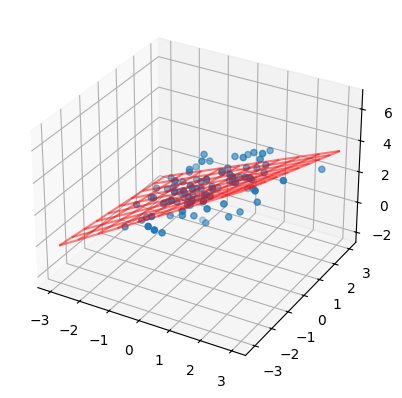

In [100]:


b=rozk_QR(M4, y)
print(f"{b=}")
norms.append(residual_norm(M4, b, y))
_X, _Y = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
Y4 = b[0] + b[1] * _X + b[2] * _Y + b[3] * _X * _Y
print(f"Macierz Z:{M2.shape}, b:{b.shape}, y:{y.shape}")

print(f"Norma residuum dla modelu 4: {norms[3]}")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, label='Dane rzeczywiste')
ax.plot_wireframe(_X, _Y, Y4, color='red', alpha=0.5, label='Dopasowanie liniowe')
plt.show()

Najlepszym dopasowiem charakteryzuje się model 3, który najbardziej przypomina rzeczywisty wzór sygnału. Wartości b, są najbliższe do tych, na podstawie których został wyliczony rzeczywisty sygnał.
Modele 1 oraz 2, przez to, że nie biorą pod uwagi jednej ze zmiennych, bardzo odbiegają od rzeczywistego sygnału.
Model 4 ma podobny błąd do modelu 3. Ze względu na to że w oryginalnym wzorze nie występuje brany pod uwagę czynnik x1x2, który nie ma wpływu jak wygląda ten sygnał, tak więc dopasowywuje się on pod szum.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)